In [1]:
import os
import sys
import socket
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

In [2]:
#directories
calibration_path = 'calibration_params'
if not os.path.isdir(calibration_path):
    os.mkdir(calibration_path)

#####################################
frames_dir = 'frames'
if not os.path.isdir(frames_dir):
    os.mkdir(frames_dir)
right_dir = 'frames/right'
if not os.path.isdir(right_dir):
    os.mkdir(right_dir)
left_dir = 'frames/left'
if not os.path.isdir(left_dir):
    os.mkdir(left_dir)
front_dir = 'frames/front'
if not os.path.isdir(front_dir):
    os.mkdir(front_dir)
back_dir = 'frames/back'
if not os.path.isdir(back_dir):
    os.mkdir(back_dir)
    
###############################################################3
undistoreted_dir = 'undistorted_frames'
if not os.path.isdir(undistoreted_dir):
    os.mkdir(undistoreted_dir)
right_dir_undist = 'undistorted_frames/right'
if not os.path.isdir(right_dir_undist):
    os.mkdir(right_dir_undist)
left_dir_undist = 'undistorted_frames/left'
if not os.path.isdir(left_dir_undist):
    os.mkdir(left_dir_undist)
front_dir_undist = 'undistorted_frames/front'
if not os.path.isdir(front_dir_undist):
    os.mkdir(front_dir_undist)
back_dir_undist = 'undistorted_frames/back'
if not os.path.isdir(back_dir_undist):
    os.mkdir(back_dir_undist)
    
##################################################
calibration_frames_dir = 'calibration_frames'
if not os.path.isdir(calibration_frames_dir):
    os.mkdir(calibration_frames_dir)
right_dir_calib = 'calibration_frames/right'
if not os.path.isdir(right_dir_calib):
    os.mkdir(right_dir_calib)
left_dir_calib = 'calibration_frames/left'
if not os.path.isdir(left_dir_calib):
    os.mkdir(left_dir_calib)
front_dir_calib = 'calibration_frames/front'
if not os.path.isdir(front_dir_calib):
    os.mkdir(front_dir_calib)
back_dir_calib = 'calibration_frames/back'
if not os.path.isdir(back_dir_calib):
    os.mkdir(back_dir_calib)
    
##################################################
warped_frames_dir = 'warped_frames'
if not os.path.isdir(warped_frames_dir):
    os.mkdir(warped_frames_dir)
right_dir_warped = 'warped_frames/right'
if not os.path.isdir(right_dir_warped):
    os.mkdir(right_dir_warped)
left_dir_warped = 'warped_frames/left'
if not os.path.isdir(left_dir_warped):
    os.mkdir(left_dir_warped)
front_dir_warped = 'warped_frames/front'
if not os.path.isdir(front_dir_warped):
    os.mkdir(front_dir_warped)
back_dir_warped= 'warped_frames/back'
if not os.path.isdir(back_dir_warped):
    os.mkdir(back_dir_warped)
    
rightpath = os.path.join(frames_dir,'right')
leftpath = os.path.join(frames_dir,'left')
frontpath = os.path.join(frames_dir,'front')
backpath = os.path.join(frames_dir,'back')

rightpath_calib = os.path.join(calibration_frames_dir,'right')
leftpath_calib = os.path.join(calibration_frames_dir,'left')
frontpath_calib = os.path.join(calibration_frames_dir,'front')
backpath_calib = os.path.join(calibration_frames_dir,'back')

rightpath_warped = os.path.join(warped_frames_dir,'right')
leftpath_warped = os.path.join(warped_frames_dir,'left')
frontpath_warped = os.path.join(warped_frames_dir,'front')
backpath_warped = os.path.join(warped_frames_dir,'back')

rightpath_undist = os.path.join(undistoreted_dir,'right')
leftpath_undist = os.path.join(undistoreted_dir,'left')
frontpath_undist = os.path.join(undistoreted_dir,'front')
backpath_undist = os.path.join(undistoreted_dir,'back')

undistoretedpath = undistoreted_dir
calibration_frames_path = calibration_frames_dir
warped_frames_path = warped_frames_dir

calibration_file_path_list = []
calibration_params_file = 'calibration_params_'+'left'+'.pickle'
calibration_file_path_left = os.path.join(calibration_path,calibration_params_file)
calibration_file_path_list.append(calibration_file_path_left)
calibration_params_file = 'calibration_params_'+'right'+'.pickle'
calibration_file_path_right = os.path.join(calibration_path,calibration_params_file)
calibration_file_path_list.append(calibration_file_path_right)
calibration_params_file = 'calibration_params_'+'front'+'.pickle'
calibration_file_path_front = os.path.join(calibration_path,calibration_params_file)
calibration_file_path_list.append(calibration_file_path_front)
calibration_params_file = 'calibration_params_'+'back'+'.pickle'
calibration_file_path_back = os.path.join(calibration_path,calibration_params_file)
calibration_file_path_list.append(calibration_file_path_back)

In [3]:
def display_frames(frames_path,frame_number):
    left_path = os.path.join(frames_path,'left')
    right_path = os.path.join(frames_path,'right')
    front_path = os.path.join(frames_path,'front')
    back_path = os.path.join(frames_path,'back')
    for fname in os.listdir(right_path):
        i = [x.isdigit() for x in fname].index(True)
        name = fname[0:i]
        break
    leftframe_path = os.path.join(left_path,name+str(frame_number)+'.png')
    rightframe_path = os.path.join(right_path,name+str(frame_number)+'.png')
    frontframe_path = os.path.join(front_path,name+str(frame_number)+'.png')
    backframe_path = os.path.join(back_path,name+str(frame_number)+'.png')
    leftframe = cv2.imread(leftframe_path)
    rightframe = cv2.imread(rightframe_path)
    frontframe = cv2.imread(frontframe_path)
    backframe = cv2.imread(backframe_path)
    f, axarr = plt.subplots(1,4,figsize=(15,15))
    print('Left\tRight\tFront\tBack')
    axarr[0].imshow(leftframe)
    axarr[1].imshow(rightframe)
    axarr[2].imshow(frontframe)
    axarr[3].imshow(backframe)
    plt.show()
    '''
    print('left :')
    plt.imshow(leftframe)
    plt.show()
    print('right :')
    plt.imshow(rightframe)
    plt.show()
    print('front :')
    plt.imshow(frontframe)
    plt.show()
    print('back :')
    plt.imshow(backframe)
    plt.show()
    '''
    return leftframe,rightframe,frontframe,backframe

In [4]:
def read_TCP_image(data):
    imagenumpy = np.array(data,dtype = np.uint8)
    R1 = imagenumpy[0:Res].reshape((H,W))
    G1 = imagenumpy[Res:Res*2].reshape((H,W))
    B1 = imagenumpy[Res*2:Res*3].reshape((H,W))
    #R2 = imagenumpy[Res*3:Res*4].reshape((H,W))
    #G2 = imagenumpy[Res*4:Res*5].reshape((H,W))
    #B2 = imagenumpy[Res*5:Res*6].reshape((H,W))
    imgL = np.dstack((R1,G1,B1))
    #imgR = np.dstack((R2,G2,B2))
    imgL = np.rot90(imgL, 3)
    #imgR = np.rot90(imgR, 3)
    #return imgL,imgR
    return imgL

In [5]:
def readnbyte(sock, n):
    buff = bytearray(n)
    pos = 0
    while pos < n:
        cr = sock.recv_into(memoryview(buff)[pos:])
        pos += cr
    return buff

In [6]:
def calibrate_fish(chess_board_dims,calib_dir):
    CHECKERBOARD = chess_board_dims
    subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
    calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW
    objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
    objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
    _img_shape = None
    objpoints = [] # 3d point in real world space
    imgpoints = [] # 2d points in image plane.
    calibrationdir = calib_dir
    for fname in os.listdir(calibrationdir):
        img = cv2.imread(os.path.join(calibrationdir,fname))
        if _img_shape == None:
            _img_shape = img.shape[:2]
        else:
            assert _img_shape == img.shape[:2], "All images must share the same size."
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Find the chess board corners
        ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
        #print (ret,corners)
        # If found, add object points, image points (after refining them)
        if ret == True:
            print(fname)
            objpoints.append(objp)
            cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
            imgpoints.append(corners)
    N_OK = len(objpoints)
    K = np.zeros((3, 3))
    D = np.zeros((4, 1))
    DIM = _img_shape[::-1]
    rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
    tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
    rms, _, _, _, _ = \
        cv2.fisheye.calibrate(
            objpoints,
            imgpoints,
            gray.shape[::-1],
            K,
            D,
            rvecs,
            tvecs,
            calibration_flags,
            (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
        )
    print("Found " + str(N_OK) + " valid images for calibration")
    print("DIM=" + str(_img_shape[::-1]))
    print("K=np.array(" + str(K.tolist()) + ")")
    print("D=np.array(" + str(D.tolist()) + ")")
    return K,D,DIM

In [7]:
def get_frames(path,sizeimg,num_frames = -1,port = 1117,host = "127.0.0.1",save_img = True , show_img = False):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((host, port))
        s.listen()
        conn, addr = s.accept()
        iterator2 = 0
        with conn:
            print('Connected by', addr)
            while True:
                data = readnbyte(conn,sizeimg)
                if (not data):
                    cv2.destroyAllWindows()
                    break
                imgL = read_TCP_image(data)
                #depth = calculate_depth(imgR,imgL,f,b)
                #norm_depth = cv2.normalize(depth,None, alpha=0, beta=5000,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
                if(save_img):
                    cv2.imwrite(os.path.join(path,'frame'+str(iterator2)+'.png'),imgL)
                    #cv2.imwrite(os.path.join(rightpath,'frame'+str(iterator2)+'.png'),imgR)
                    #cv2.imwrite(os.path.join(depthpath,'depth'+str(iterator2)+'.png'),norm_depth)
                if(show_img): 
                    cv2.imshow('frame',imgL)
                    cv2.waitKey(1)
                    #cv2.imshow('depth',norm_depth)
                    #cv2.waitKey(1)
                iterator2+= 1
                if (iterator2 == num_frames):
                    break

In [8]:
def get_frames_four_sides(path,sizeimg,num_frames = -1,port = 1117,host = "127.0.0.1",save_img = True , show_img = False):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((host, port))
        s.listen()
        conn, addr = s.accept()
        iterator2 = 0
        with conn:
            print('Connected by', addr)
            while True:
                data = readnbyte(conn,sizeimg*4)
                if (not data):
                    cv2.destroyAllWindows()
                    break
                imgL = read_TCP_image(data[0:sizeimg])
                imgR = read_TCP_image(data[sizeimg:sizeimg*2])
                imgT = read_TCP_image(data[sizeimg*2:sizeimg*3])
                imgB = read_TCP_image(data[sizeimg*3:sizeimg*4])
                #depth = calculate_depth(imgR,imgL,f,b)
                #norm_depth = cv2.normalize(depth,None, alpha=0, beta=5000,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
                if(save_img):
                    cv2.imwrite(os.path.join(path,'left/frame'+str(iterator2)+'.png'),imgL)
                    cv2.imwrite(os.path.join(path,'right/frame'+str(iterator2)+'.png'),imgR)
                    cv2.imwrite(os.path.join(path,'front/frame'+str(iterator2)+'.png'),imgT)
                    cv2.imwrite(os.path.join(path,'back/frame'+str(iterator2)+'.png'),imgB)
                    #cv2.imwrite(os.path.join(rightpath,'frame'+str(iterator2)+'.png'),imgR)
                    #cv2.imwrite(os.path.join(depthpath,'depth'+str(iterator2)+'.png'),norm_depth)
                if(show_img): 
                    cv2.imshow('frame',imgL)
                    cv2.waitKey(1)
                    #cv2.imshow('depth',norm_depth)
                    #cv2.waitKey(1)
                iterator2+= 1
                if (iterator2 == num_frames):
                    break

In [9]:
def calibrate_and_save(frames_path,calibration_file_path,cardboard_dims=7):
    chess_board_dims = (cardboard_dims,cardboard_dims)
    calibration_params = calibrate_fish(chess_board_dims,frames_path)
    calibration_file = open(calibration_file_path, "wb")
    pickle.dump(calibration_params,calibration_file)
    calibration_file.close()

In [10]:
def load_calibration_params(calibration_file_path):
    calibration_file = open(calibration_file_path, "rb")
    calibration_params = pickle.load(calibration_file)
    calibration_file.close()
    return calibration_params

In [11]:
def undistort_fisheye(calibration_params,path,undistoretedpath):
    K,D,DIM = calibration_params
    undistorted = []
    for fname in os.listdir(path):
        distorted = cv2.imread(os.path.join(path,fname))
        K_new = K.copy()
        if undistoretedpath[-4:] == 'left' or undistoretedpath[-4:] == 'ight':
            K_new[0,0] = K[0,0]/3
            K_new[1,1] = K[1,1]/3
        elif undistoretedpath[-4:] == 'ront' or undistoretedpath[-4:] == 'back':
            K_new[0,0] = K[0,0]/2
            K_new[1,1] = K[1,1]/2
        #K_new = cv2.getOptimalNewCameraMatrix(K,D,distorted.shape[0:2],1)
        #K_new = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(K,D,(distorted.shape[1],distorted.shape[0]),np.eye(3))
        #map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K_new, DIM, cv2.CV_16SC2)
        #undistorted_img = cv2.remap(distorted, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
        undistorted_img = cv2.fisheye.undistortImage(distorted,K,D,None,K_new)
        undistorted.append(undistorted_img)
        cv2.imwrite(os.path.join(undistoretedpath,'undistoreted'+fname),undistorted_img)

In [12]:
def undistort_fisheye_no_files(calibration_params,img,side):
    K,D,DIM = calibration_params
    distorted = img
    K_new = K.copy()
    if side == 'left' or side == 'right':
        K_new[0,0] = K[0,0]/3
        K_new[1,1] = K[1,1]/3
    elif side == 'front' or side == 'back':
        K_new[0,0] = K[0,0]/2
        K_new[1,1] = K[1,1]/2
    undistorted_img = cv2.fisheye.undistortImage(distorted,K,D,None,K_new)
    return undistorted_img

In [13]:
def warp2(img,DIM,percentage_X = 0.5,percentage_Y = 0.5):
    X = DIM[0]
    Y = DIM[1]
    cut_X = int(X*(1-percentage_X)/2)
    cut_Y = int(Y*(1-percentage_Y))
    
    pt1 = [cut_X,cut_Y] #Top-Left
    pt2 = [X-cut_X,cut_Y] #Top-Right
    pt3 = [X,Y] #Bottom-Right
    pt4 = [0,Y] #Bottom-Left
    
    pts_list = [pt1,pt2,pt3,pt4]
    # read input
    # specify desired output size 
    width = X - cut_X*2
    height = Y - cut_Y
    # specify conjugate x,y coordinates (not y,x)
    input_pts = np.float32(pts_list)
    #for val in input_pts:
    #    cv2.circle(img,(val[0],val[1]),5,(0,255,0),-1)
    output_pts = np.float32([[0,0], [width,0], [width,height], [0,height]])
    # compute perspective matrix
    matrix = cv2.getPerspectiveTransform(input_pts,output_pts)
    # do perspective transformation setting area outside input to black
    imgOutput = cv2.warpPerspective(img, matrix, (width,height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
    return imgOutput

def warp(img,DIM,side):
    X = DIM[0]
    Y = DIM[1]
    
    if side == 'left':
        #TL,TR,BR,BL
        pt1 = [237,231]
        pt2 = [396,231]
        pt3 = [550,334]
        pt4 = [43,334]
        width_up = 512
        width_down = 140
        height = 189
    elif side == 'ront':
        pt1 = [170,230]
        pt2 = [467,230]
        pt3 = [587,441]
        pt4 = [46,441]
        width_up = 512
        width_down = 189
        height = 140
    elif side == 'back':
        pt1 = [173,230]
        pt2 = [466,230]
        pt3 = [571,427]
        pt4 = [67,427]
        width_up = 512
        width_down = 189
        height = 140
    elif side == 'ight':
        pt1 = [243,231]
        pt2 = [400,231]
        pt3 = [583,336]
        pt4 = [78,336]
        width_up = 512
        width_down = 140
        height = 189
    else:
        print('Error in directories!')
        return None
    
    pts_list = [pt1,pt2,pt3,pt4]
    # read input
    # specify desired output size 
    # specify conjugate x,y coordinates (not y,x)
    input_pts = np.float32(pts_list)
    #for val in input_pts:
    #    cv2.circle(img,(val[0],val[1]),5,(0,255,0),-1)
    output_pts = np.float32([[0,0], [width_up,0], [width_up - width_down,height], [width_down,height]])
    # compute perspective matrix
    matrix = cv2.getPerspectiveTransform(input_pts,output_pts)
    # do perspective transformation setting area outside input to black
    imgOutput = cv2.warpPerspective(img, matrix, (width_up,height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
    return imgOutput


def percpective_transform(frames_path,warped_path,calibration_params,percentage_X = 0.5,percentage_Y = 0.5,show_image= False):
    DIM = calibration_params[2]
    for fname in os.listdir(frames_path):
        test = cv2.imread(os.path.join(frames_path,fname))
        #warped = warp2(test,DIM,percentage_X=percentage_X,percentage_Y=percentage_Y)
        warped = warp(test,DIM,frames_path[-4:])
        cv2.imwrite(os.path.join(warped_path,fname),warped)
        if (show_image):
            plt.imshow(test)
            plt.show()
            plt.imshow(warped)
            plt.show()
    
def percpective_transform_no_files(undist_img,calibration_params,side):
    DIM = calibration_params[2]
    warped = warp(undist_img,DIM,side)
    return warped

In [14]:
#image dimensions
H = 640
W = 480
Res = H*W
#TCP params
HOST = '127.0.0.1'
PORT = 1117
saveImg = True
showImg = False
sizeimg = H*W*(3*1)
#focal and baseline UNUSED
f = 75e-4
b = 0.1

In [15]:
#GET FRAMES

#get_frames_four_sides(frames_dir,sizeimg,num_frames=1)


In [16]:
#GET CALIBRATION FRAMES

#get_frames_four_sides(calibration_frames_dir,sizeimg,num_frames=120)



In [17]:
'''
print("Calibrating...")
calibrate_and_save(backpath_calib,calibration_file_path_back)
print("Back side camera calibration complete ...")
calibrate_and_save(frontpath_calib,calibration_file_path_front)
print("Front side camera calibration complete ...")
calibrate_and_save(leftpath_calib,calibration_file_path_left)
print("Left side camera calibration complete ...")
calibrate_and_save(rightpath_calib,calibration_file_path_right)
print("Right side camera calibration complete ...")
print("Done!")
'''

'\nprint("Calibrating...")\ncalibrate_and_save(backpath_calib,calibration_file_path_back)\nprint("Back side camera calibration complete ...")\ncalibrate_and_save(frontpath_calib,calibration_file_path_front)\nprint("Front side camera calibration complete ...")\ncalibrate_and_save(leftpath_calib,calibration_file_path_left)\nprint("Left side camera calibration complete ...")\ncalibrate_and_save(rightpath_calib,calibration_file_path_right)\nprint("Right side camera calibration complete ...")\nprint("Done!")\n'

In [18]:
calibration_params_right = load_calibration_params(calibration_file_path_right)
calibration_params_left = load_calibration_params(calibration_file_path_left)
calibration_params_front = load_calibration_params(calibration_file_path_front)
calibration_params_back = load_calibration_params(calibration_file_path_back)

undistort_fisheye(calibration_params_left,leftpath,leftpath_undist)
undistort_fisheye(calibration_params_right,rightpath,rightpath_undist)
undistort_fisheye(calibration_params_front,frontpath,frontpath_undist)
undistort_fisheye(calibration_params_back,backpath,backpath_undist)

In [19]:
percpective_transform(leftpath_undist,left_dir_warped,calibration_params_left)
percpective_transform(rightpath_undist,right_dir_warped,calibration_params_right)
percpective_transform(frontpath_undist,front_dir_warped,calibration_params_front)
percpective_transform(backpath_undist,back_dir_warped,calibration_params_back)

Left	Right	Front	Back


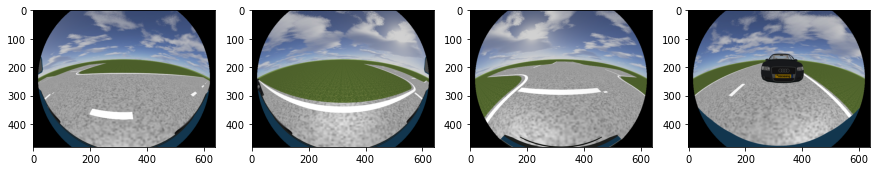

Left	Right	Front	Back


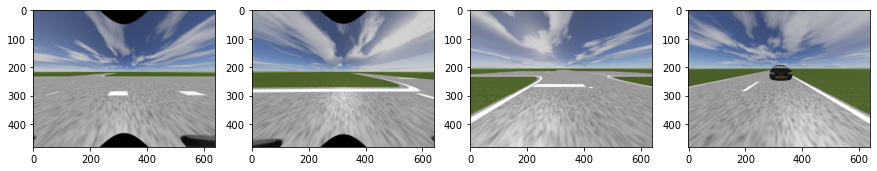

Left	Right	Front	Back


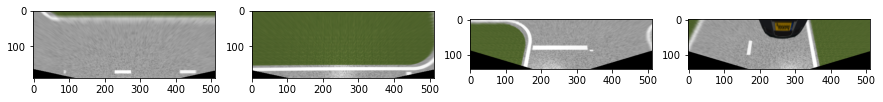

In [20]:
display_frames(frames_dir,1)
display_frames(undistoreted_dir,1)
warped = display_frames(warped_frames_path,1)

In [45]:
def stitch(warped,car_symbol):
    left = warped[0]
    right = warped[1]
    front = warped[2]
    back = warped[3]
    front_ext = np.fliplr(np.vstack((front,np.zeros((372,512,3),np.uint8))))
    back_flipped = np.fliplr(np.rot90(back,k=2))
    back_ext = np.vstack((np.zeros((372,512,3),np.uint8),back_flipped))
    left_flipped = np.rot90(np.fliplr(left))
    left_ext = np.hstack((left_flipped,np.zeros((512,323,3),np.uint8)))
    right_flipped = np.rot90(np.fliplr(right),k=3)
    right_ext = np.hstack((np.zeros((512,323,3),np.uint8),right_flipped))
    
    front_ext[left_ext!=0] = 0
    front_ext[right_ext!=0] = 0
    back_ext[left_ext!=0] = 0
    back_ext[right_ext!=0] = 0
    
    left_ext[front_ext!=0] = 0
    left_ext[back_ext!=0] = 0
    right_ext[front_ext!=0] = 0
    right_ext[back_ext!=0] = 0
    
    #add car symbol
    car_symbol = cv2.resize(car_symbol,(134,232))
    top = 140
    bottom = top
    left = 189
    right = left
    borderType = cv2.BORDER_CONSTANT
    car_symbol = cv2.copyMakeBorder(car_symbol, top, bottom, left, right, borderType)
    
    
    bird_eye = front_ext + back_ext + left_ext + right_ext + car_symbol
    return bird_eye

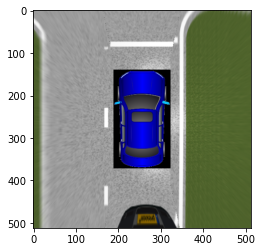

In [47]:
bev = stitch(warped,car_symbol)
plt.imshow(bev)

In [23]:
'''mask_front = cv2.imread('frame_masks/' + 'mask_front.png')
mask_back = cv2.imread('frame_masks/' + 'mask_back.png')
mask_right = cv2.imread('frame_masks/' + 'mask_right.png')
mask_left = cv2.imread('frame_masks/' + 'mask_left.png')
num_frame = 20
left = cv2.imread(left_dir_warped+'/warped'+str(num_frame)+'.png')
right = cv2.imread(right_dir_warped+'/warped'+str(num_frame)+'.png')
front = cv2.imread(front_dir_warped+'/warped'+str(num_frame)+'.png')
back = cv2.imread(back_dir_warped+'/warped'+str(num_frame)+'.png')

front_ext = np.fliplr(np.vstack((front,np.zeros((372,512,3),np.uint8))))
back_flipped = np.fliplr(np.rot90(back,k=2))
back_ext = np.vstack((np.zeros((372,512,3),np.uint8),back_flipped))
left_flipped = np.rot90(np.fliplr(left))
left_ext = np.hstack((left_flipped,np.zeros((512,323,3),np.uint8)))
right_flipped = np.rot90(np.fliplr(right),k=3)
right_ext = np.hstack((np.zeros((512,323,3),np.uint8),right_flipped))


kernel = np.ones((9,9), np.uint8)
mask_front = cv2.dilate(mask_front, kernel, iterations=1)
mask_back = cv2.dilate(mask_back, kernel, iterations=1)
mask_right = cv2.erode(mask_right, kernel, iterations=1)
mask_left = cv2.erode(mask_left, kernel, iterations=1)
unmasked_bird = front_ext + back_ext + left_ext + right_ext

mask_front[mask_front == 0] = 1
mask_back[mask_back == 0] = 5
mask_left[mask_left == 0] = 9
mask_right[mask_right == 0] = 3

total_mask = mask_front + mask_back + mask_right + mask_left

print(np.unique(total_mask))


front_subset = np.where((total_mask == 10) | (total_mask == 1) | (total_mask == 4))
left_subset = np.where((total_mask == 9))
right_subset = np.where((total_mask == 3))
back_subset = np.where((total_mask == 14) | (total_mask == 5) | (total_mask == 8))

mask_front[front_subset] = 0
mask_back[back_subset] = 0
mask_left[left_subset] = 255
mask_right[right_subset] = 255

total_mask = mask_front + mask_back + mask_right + mask_left

front_ext[mask_front==255] = 0
back_ext[mask_back==255] = 0
right_ext[mask_right==255] = 0
left_ext[mask_left==255] = 0
bird_eye = front_ext + back_ext + left_ext + right_ext

plt.imshow(bird_eye)'''

"mask_front = cv2.imread('frame_masks/' + 'mask_front.png')\nmask_back = cv2.imread('frame_masks/' + 'mask_back.png')\nmask_right = cv2.imread('frame_masks/' + 'mask_right.png')\nmask_left = cv2.imread('frame_masks/' + 'mask_left.png')\nnum_frame = 20\nleft = cv2.imread(left_dir_warped+'/warped'+str(num_frame)+'.png')\nright = cv2.imread(right_dir_warped+'/warped'+str(num_frame)+'.png')\nfront = cv2.imread(front_dir_warped+'/warped'+str(num_frame)+'.png')\nback = cv2.imread(back_dir_warped+'/warped'+str(num_frame)+'.png')\n\nfront_ext = np.fliplr(np.vstack((front,np.zeros((372,512,3),np.uint8))))\nback_flipped = np.fliplr(np.rot90(back,k=2))\nback_ext = np.vstack((np.zeros((372,512,3),np.uint8),back_flipped))\nleft_flipped = np.rot90(np.fliplr(left))\nleft_ext = np.hstack((left_flipped,np.zeros((512,323,3),np.uint8)))\nright_flipped = np.rot90(np.fliplr(right),k=3)\nright_ext = np.hstack((np.zeros((512,323,3),np.uint8),right_flipped))\n\n\nkernel = np.ones((9,9), np.uint8)\nmask_front 

In [24]:
def get_frames_from_file(path,iterator,extension = 'png'):
    imgL = cv2.imread(path+'/left'+'/frame'+str(iterator)+'.'+extension)
    imgR = cv2.imread(path+'/right'+'/frame'+str(iterator)+'.'+extension)
    imgF = cv2.imread(path+'/front'+'/frame'+str(iterator)+'.'+extension)
    imgB = cv2.imread(path+'/back'+'/frame'+str(iterator)+'.'+extension)
    return imgL,imgR,imgF,imgB

In [44]:
car_symbol = cv2.imread('Car_Symbol/symbol.png')

In [43]:

def bird_eye_view_stream(sizeimg,calibration_file_path_list,num_frames = -1,port = 1117,host = "127.0.0.1",save = False):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((host, port))
        s.listen()
        conn, addr = s.accept()
        iterator2 = 0
        with conn:
            print('Connected by', addr)
            while True:
                data = readnbyte(conn,sizeimg*4)
                if (not data):
                    cv2.destroyAllWindows()
                    break
                imgL = read_TCP_image(data[0:sizeimg])
                imgR = read_TCP_image(data[sizeimg:sizeimg*2])
                imgT = read_TCP_image(data[sizeimg*2:sizeimg*3])
                imgB = read_TCP_image(data[sizeimg*3:sizeimg*4])

                calibration_file_path_left = calibration_file_path_list[0]
                calibration_file_path_right = calibration_file_path_list[1]
                calibration_file_path_front = calibration_file_path_list[2]
                calibration_file_path_back = calibration_file_path_list[3]

                calibration_params_right = load_calibration_params(calibration_file_path_right)
                calibration_params_left = load_calibration_params(calibration_file_path_left)
                calibration_params_front = load_calibration_params(calibration_file_path_front)
                calibration_params_back = load_calibration_params(calibration_file_path_back)

                undistL = undistort_fisheye_no_files(calibration_params_left,imgL,'left')
                undistR = undistort_fisheye_no_files(calibration_params_right,imgR,'right')
                undistF = undistort_fisheye_no_files(calibration_params_front,imgT,'front')
                undistB = undistort_fisheye_no_files(calibration_params_back,imgB,'back')

                warped = [0]*4

                warped[0] = percpective_transform_no_files(undistL,calibration_params_left,'left')
                warped[1] = percpective_transform_no_files(undistR,calibration_params_right,'ight')
                warped[2] = percpective_transform_no_files(undistF,calibration_params_front,'ront')
                warped[3] = percpective_transform_no_files(undistB,calibration_params_back,'back')
                
                if (save == True):
                    cv2.imwrite(left_dir_warped+'/warped'+str(iterator2)+'.png',warped[0])
                    cv2.imwrite(right_dir_warped+'/warped'+str(iterator2)+'.png',warped[1])
                    cv2.imwrite(front_dir_warped+'/warped'+str(iterator2)+'.png',warped[2])
                    cv2.imwrite(back_dir_warped+'/warped'+str(iterator2)+'.png',warped[3])
                    
                bird_view = stitch(warped,car_symbol)
                
               # kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
               # bird_view = cv2.filter2D(bird_view,-1,kernel)

                cv2.imshow('Bird Eye View',bird_view)
                cv2.waitKey(1)

                iterator2+= 1
                if (iterator2 == num_frames):
                    cv2.destroyAllWindows()
                    break

In [ ]:
bird_eye_view_stream(sizeimg,calibration_file_path_list,save = False)

Connected by ('127.0.0.1', 63781)
